In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from src.preprocessing import preprocess_data
from src.models import perform_clustering

c:\Users\Lenovo\anaconda3\envs\churn_env\python312.zip
c:\Users\Lenovo\anaconda3\envs\churn_env\DLLs
c:\Users\Lenovo\anaconda3\envs\churn_env\Lib
c:\Users\Lenovo\anaconda3\envs\churn_env

c:\Users\Lenovo\anaconda3\envs\churn_env\Lib\site-packages
c:\Users\Lenovo\anaconda3\envs\churn_env\Lib\site-packages\win32
c:\Users\Lenovo\anaconda3\envs\churn_env\Lib\site-packages\win32\lib
c:\Users\Lenovo\anaconda3\envs\churn_env\Lib\site-packages\Pythonwin
c:\Users\Lenovo\Customer-Churn-Prediction-Segmentation


In [3]:
# Step 1: Load and preprocess data
df = pd.read_csv('../../data/customer_data.csv')
X, y, X_scaled = preprocess_data(df)

In [4]:
# Step 2: Perform clustering
clustered_df = perform_clustering(X_scaled, n_clusters=4)
clustered_df['Churn'] = y.values  # Add target for profiling

In [5]:
# Step 3: PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

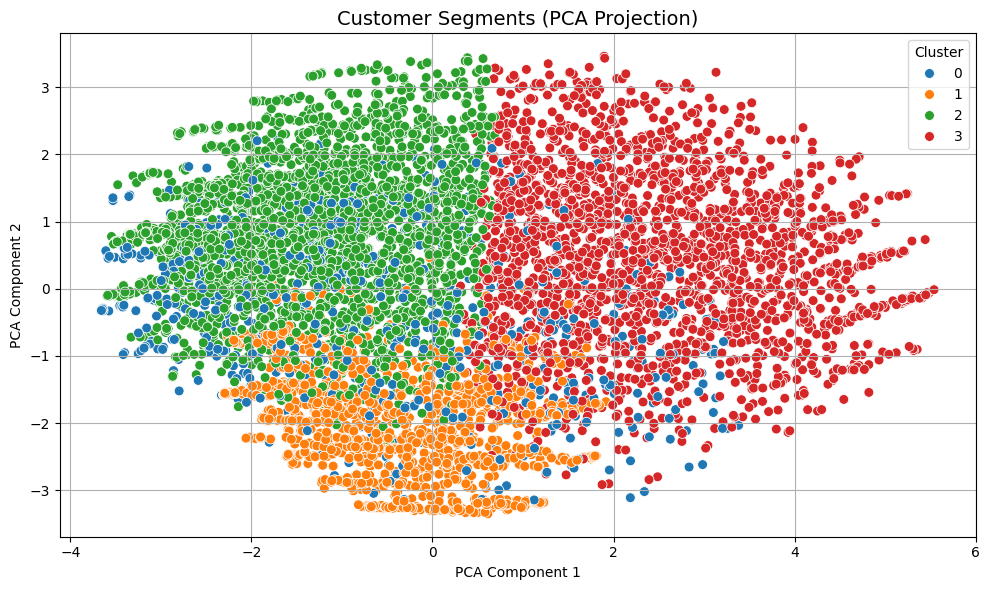

In [6]:
# Step 4: PCA scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1],
                hue=clustered_df['cluster'], palette='tab10', s=50)
plt.title('Customer Segments (PCA Projection)', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2444\454797058.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=clustered_df, palette='tab10')


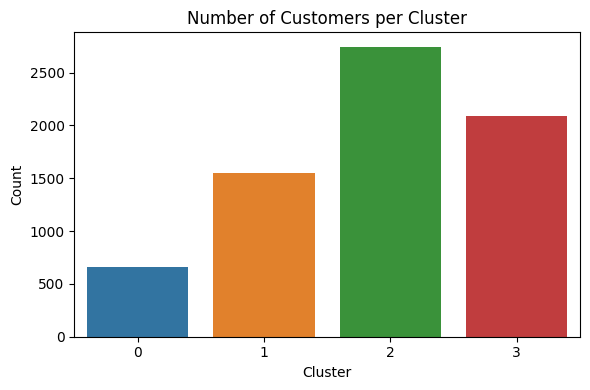

In [7]:
# Step 5: Cluster sizes
plt.figure(figsize=(6, 4))
sns.countplot(x='cluster', data=clustered_df, palette='tab10')
plt.title('Number of Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2444\3955231947.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='coolwarm')


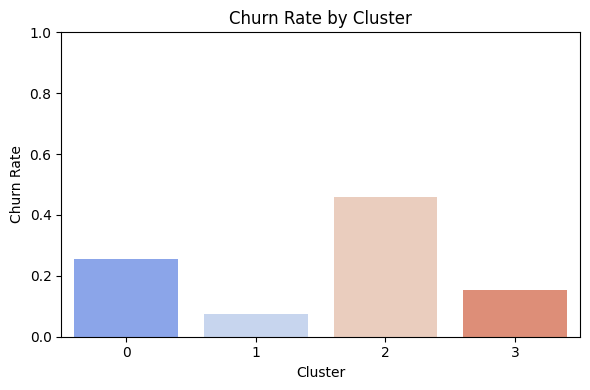

In [8]:
# Step 6: Churn rate per cluster
plt.figure(figsize=(6, 4))
churn_rate = clustered_df.groupby('cluster')['Churn'].mean()
sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='coolwarm')
plt.title('Churn Rate by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [9]:
# Step 7: Feature profile by cluster (mean values)
feature_df = pd.DataFrame(X, columns=df.drop(columns=['customerID', 'Churn'], errors='ignore').columns)
feature_df['cluster'] = clustered_df['cluster']

cluster_profiles = feature_df.groupby('cluster').mean().T


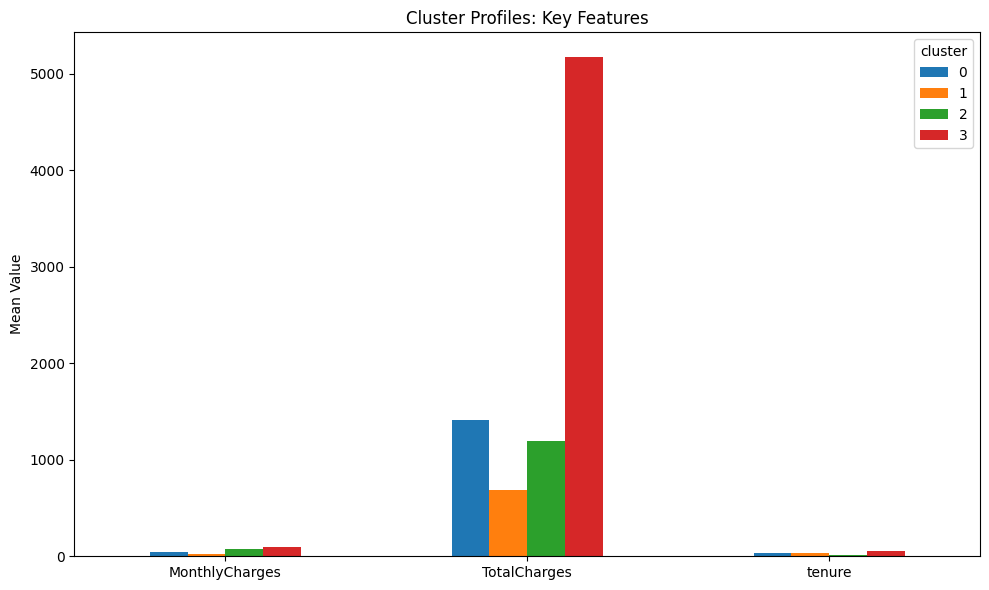

In [10]:
# Plot selected features by cluster
selected_features = ['MonthlyCharges', 'TotalCharges', 'tenure']

cluster_profiles.loc[selected_features].plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Profiles: Key Features')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()